In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('data1.parquet', engine='fastparquet') #Replace with the path to your parquet file

### 1. Meaningful Index

Try to change the index of the merged dataset to the `id`, `permno` and `gvkey` columns. Would this cause any problems? If so, what are they? Would using `MultiIndex` be a better option to having a meaningful index?

In [ ]:
#TODO

df_id = df.set_index('id')
df_permno = df.set_index('permno')
df_gvkey = df.set_index('gvkey')

In [6]:
df_id

eom   gvkey   permno size_grp           me  ebit_sale  \
id                                                                     
75100.0 2008-04-30  013646  75100.0    large  5489.871635   0.174083   
75100.0 2008-05-31  013646  75100.0    large  6182.094486   0.176267   
75100.0 2008-10-31  013646  75100.0    large  3404.019695   0.187391   
75100.0 2008-11-30  013646  75100.0    large  2454.118434   0.190308   
75100.0 2009-04-30  013646  75100.0    large  3586.389566   0.196993   
...            ...     ...      ...      ...          ...        ...   
75101.0 2010-07-31  013554  75101.0    small   752.514996   0.076532   
75101.0 2010-10-31  013554  75101.0    small   873.381019   0.087288   
75101.0 2010-11-30  013554  75101.0    small   988.697247   0.087288   
75101.0 2011-04-30  013554  75101.0    small  1860.743383   0.101600   
75069.0 2017-01-31  012956  75069.0     nano    36.943067   0.699020   

         ebitda_mev       qmj   debt_me   ret_6_1  ret_60_12     sic  
id                                                                    
75100.0    0.111210  0.680608  0.084372 -0.222465   0.774918  5944.0  
75100.0    0.100204  0.990778  0.073298 -0.055815   0.656729  5944.0  
75100.0    0.179458  0.821848  0.179540 -0.176874   0.181513  5944.0  
75100.0    0.244357  0.918131  0.260456 -0.435112   0.059393  5944.0  
75100.0    0.173532  0.935794  0.228997 -0.202684   0.160321  5944.0  
...             ...       ...       ...       ...        ...     ...  
75101.0    0.249349  0.560790  0.000000 -0.061047  -0.591372  3140.0  
75101.0    0.223930  0.501944  0.000000 -0.078605  -0.425222  3140.0  
75101.0    0.189541  0.459792  0.000000  0.094222  -0.495316  3140.0  
75101.0    0.106853  0.182866  0.000000  0.964320  -0.368576  3143.0  
75069.0    0.083049  1.038123  0.000000 -0.033535   4.545454  6552.0  

[902829 rows x 12 columns]

We can see that the column `id` is not unique as an index, as we have multiple entries for the same `id` corresponding to different dates `eom `. The same goes for `permno` and `gvkey`. Therefore, using them as an index would cause problems. Using `MultiIndex` would be a better option to have a meaningful index. For example, we can make a `MultiIndex` with `id` and `eom` columns. This way, we can have a unique index for each row.

In [7]:
df_id_eom = df.set_index(['id','eom'])
df_id_eom

gvkey   permno size_grp           me  ebit_sale  \
id      eom                                                            
75100.0 2008-04-30  013646  75100.0    large  5489.871635   0.174083   
        2008-05-31  013646  75100.0    large  6182.094486   0.176267   
        2008-10-31  013646  75100.0    large  3404.019695   0.187391   
        2008-11-30  013646  75100.0    large  2454.118434   0.190308   
        2009-04-30  013646  75100.0    large  3586.389566   0.196993   
...                    ...      ...      ...          ...        ...   
75101.0 2010-07-31  013554  75101.0    small   752.514996   0.076532   
        2010-10-31  013554  75101.0    small   873.381019   0.087288   
        2010-11-30  013554  75101.0    small   988.697247   0.087288   
        2011-04-30  013554  75101.0    small  1860.743383   0.101600   
75069.0 2017-01-31  012956  75069.0     nano    36.943067   0.699020   

                    ebitda_mev       qmj   debt_me   ret_6_1  ret_60_12  \
id      eom                                                               
75100.0 2008-04-30    0.111210  0.680608  0.084372 -0.222465   0.774918   
        2008-05-31    0.100204  0.990778  0.073298 -0.055815   0.656729   
        2008-10-31    0.179458  0.821848  0.179540 -0.176874   0.181513   
        2008-11-30    0.244357  0.918131  0.260456 -0.435112   0.059393   
        2009-04-30    0.173532  0.935794  0.228997 -0.202684   0.160321   
...                        ...       ...       ...       ...        ...   
75101.0 2010-07-31    0.249349  0.560790  0.000000 -0.061047  -0.591372   
        2010-10-31    0.223930  0.501944  0.000000 -0.078605  -0.425222   
        2010-11-30    0.189541  0.459792  0.000000  0.094222  -0.495316   
        2011-04-30    0.106853  0.182866  0.000000  0.964320  -0.368576   
75069.0 2017-01-31    0.083049  1.038123  0.000000 -0.033535   4.545454   

                       sic  
id      eom                 
75100.0 2008-04-30  5944.0  
        2008-05-31  5944.0  
        2008-10-31  5944.0  
        2008-11-30  5944.0  
        2009-04-30  5944.0  
...                    ...  
75101.0 2010-07-31  3140.0  
        2010-10-31  3140.0  
        2010-11-30  3140.0  
        2011-04-30  3143.0  
75069.0 2017-01-31  6552.0  

[902829 rows x 11 columns]

Thus now there is a unique index for each row, and we can use the `id` and `eom` columns to access the data.

### 2. Data Imputation 

Try out 2-3 different Data Imputation techniques and see which one works best for this dataset. Which imputation/interpolation technique best preserves the distribution of the data? If you do this imputations separately for each group (like for each `size_grp`), does it get better results?

In [61]:
#TODO
col_name = 'qmj'
df[f'{col_name}_median_filled'] = df[col_name].fillna(df[col_name].median())
df[f'{col_name}_interpolated'] = df[col_name].interpolate()
df[f'{col_name}_forward_filled'] = df.groupby('id')[col_name].ffill()

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
df[col_name].plot.hist(ax=axs[0, 0], title='Original data', bins = 100)
df[f'{col_name}_median_filled'].plot.hist(ax=axs[0, 1], title='Median filled data', bins = 100)
df[f'{col_name}_interpolated'].plot.hist(ax=axs[1, 0], title='Interpolated data', bins = 100)
df[f'{col_name}_forward_filled'].plot.hist(ax=axs[1, 1], title='Forward filled data', bins = 100)
plt.tight_layout()
plt.show()

We can see that using Median Imputation might not be the best fit for this data. This is because the data is not normally distributed, and the median might not be the best representative of the data. We can see that the data is uniform, so using `interpolate()` might be a better option. We can also use `ffill()` and `bfill()` to fill the missing values.

In [ ]:
group_name = 'size_grp'
df[f'{col_name}_median_filled_by_{group_name}'] = df.groupby(group_name)[col_name].transform(lambda x: x.fillna(x.median()))
df[f'{col_name}_interpolated_by_{group_name}'] = df.groupby(group_name)[col_name].transform(lambda x: x.interpolate())
df[f'{col_name}_forward_filled_by_{group_name}'] = df.groupby(group_name)[col_name].ffill()

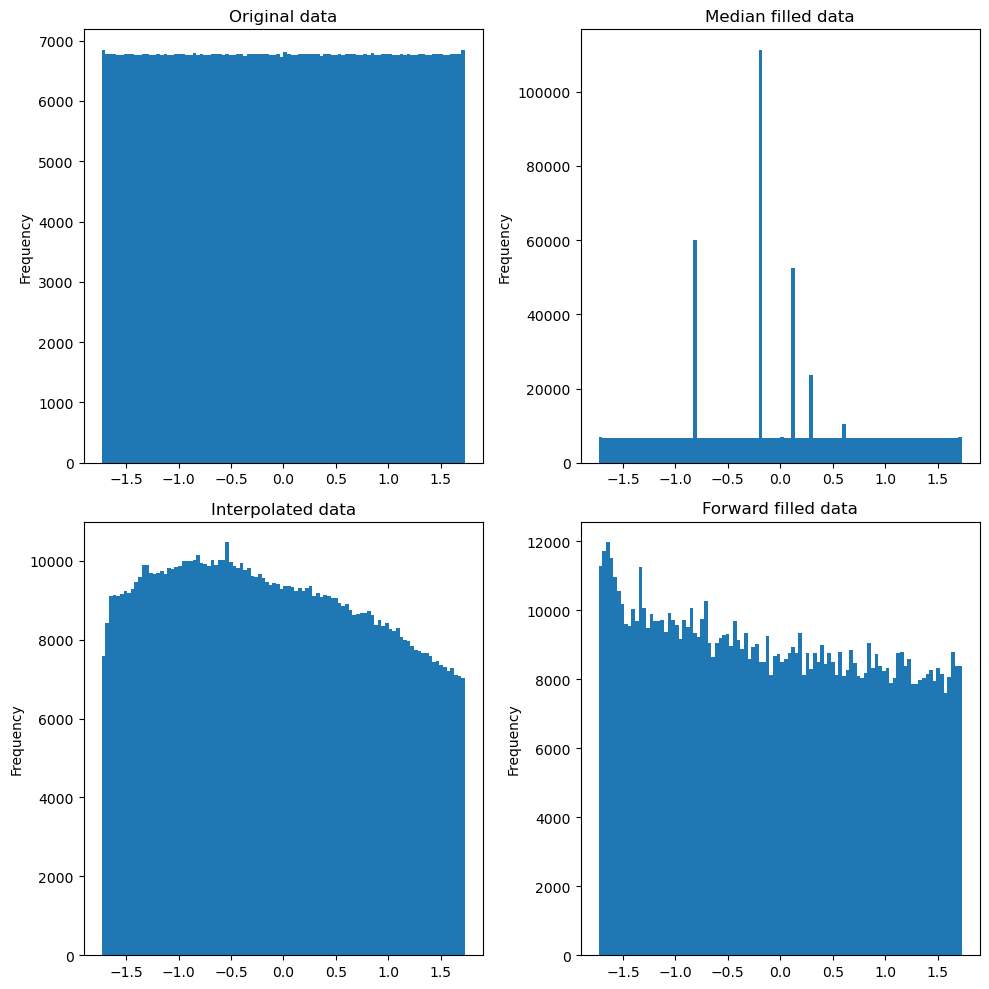

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
df[col_name].plot.hist(ax=axs[0, 0], title='Original data', bins = 100)
df[f'{col_name}_median_filled_by_{group_name}'].plot.hist(ax=axs[0, 1], title='Median filled data', bins = 100)
df[f'{col_name}_interpolated_by_{group_name}'].plot.hist(ax=axs[1, 0], title='Interpolated data', bins = 100)
df[f'{col_name}_forward_filled_by_{group_name}'].plot.hist(ax=axs[1, 1], title='Forward filled data', bins = 100)
plt.tight_layout()
plt.show()

### 3. Pivot Table

Create a pivot table with `eom` as the index, `size_grp` as the columns, and `ebitda_mev` as the values.

Also, create a Pivot table `gvkey` as the index, `eom` as the columns, and `ebit_sale` as the values.

In [53]:
#TODO
df_pivot_1 = df.pivot_table(index='eom', columns='size_grp', values='ebitda_mev', aggfunc='mean')
df_pivot_2 = df.pivot_table(index='gvkey', columns='eom', values='ebit_sale', aggfunc='median')

### 4. Data Transformations / Feature Engineering

You may have identified some columns which are very skewed during Homework 1. Transform the skewed columns from the given data using the log-normalization transformation and see if it helps in reducing the skewness. Will this transformation help in improving the model performance? If you do this transformations separately for each group (like for each unique `size_grp`), does it get better results?

Can you create any new features from the existing columns which can help in improving the model performance? 

In [80]:
#TODO
col_name = 'me'
print(f"Skewness for {col_name}: {df.me.skew()}")
df[col_name].hist(bins=100)
plt.yscale('log')
plt.title(f'Column "{col_name}"')
plt.show()

Skewness for me: 34.665276573672564


In [81]:
# Log Normalize the column
df[f'{col_name}_log'] = np.log(df[col_name] + 1)
print(f"Skewness for {col_name}_log: {df[f'{col_name}_log'].skew()}")
df[f'{col_name}_log'].hist(bins=100)
plt.title(f'Column "{col_name}_log"')
plt.show()

Skewness for me_log: 0.1845502599051991


Notice that by using a simple log transformation, we can reduce the skewness of the data. This can help in improving the model performance, especially if the data is very skewed.

### 5.  Creating a Unified Data Cleaning Pipeline

Use the `.pipe()` method to create a unified data cleaning pipeline which includes all the steps you have done so far. For each cleaning / modification step, create a separate function and pass it to the `.pipe()` method. This is useful because you can easily add or remove steps from the pipeline.

In [ ]:
#TODO
def ffill_group(df, col_name, group_name):
    df[f'{col_name}_forward_filled_by_{group_name}'] = df.groupby(group_name)[col_name].ffill()
    return df

def log_normalize(df, col_name):
    df[f'{col_name}_log'] = np.log(df[col_name] + 1)
    return df

def set_index(df, col_names):
    return df.set_index([index_name for index_name in col_names])


df_new = pd.concat([df1, df_2_3_merged], ignore_index=True)
df_new = (df_new.pipe(ffill_group, 'qmj', 'size_grp')
        .pipe(log_normalize, 'me')
        .pipe(set_index, ['id','eom'])
     )

By using `pipe()`, we can create a unified data cleaning pipeline. This is useful because we can easily add or remove steps from the pipeline. This makes the code more modular and easier to read. We can also use the `pipe()` method to apply the same set of transformations to multiple datasets or even for different columns in the same dataset without much additional code.

### 6. Resampling Data

Use the `.resample()` method to resample the data to a lesser frequency. This can be helpful if you want to analyse the stocks data for a wider horizon and do not want to remove any useful data because other columns might be Null for that row. If you resample the data such that it is now yearly, does it make any difference? Are the time-series more stable now?

/var/folders/4m/sxvmyxn52sj7hnmvp90868c40000gn/T/ipykernel_59294/2884517916.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_time[col].resample('Y').mean().plot(label=f'{col} Resampled')


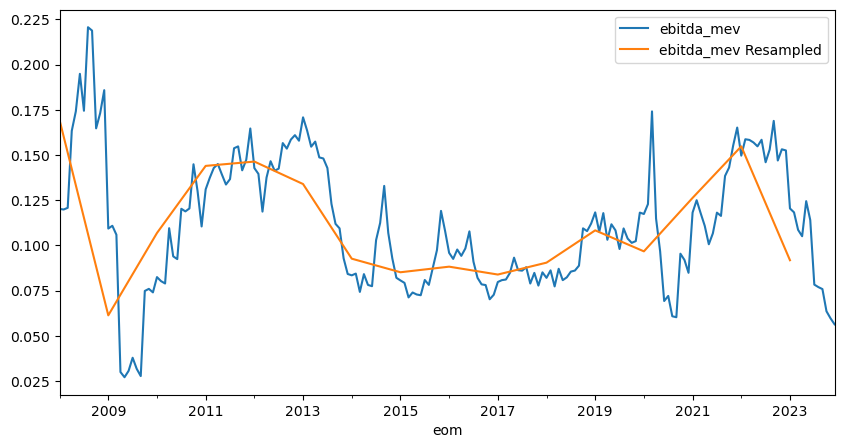

In [80]:
id = pd.Series(df.id.value_counts()[df.id.value_counts() > 30].index).sample(1).values[0]
col = 'ebitda_mev'
df_time = df_id_eom.loc[id].sort_index()
plt.figure(figsize=(10, 5))
df_time[col].plot(label=col)
df_time[col].resample('Y').mean().plot(label=f'{col} Resampled')
plt.legend()
plt.show()

We see that the time-series is more stable now after resampling. However, we have lost some data in the process. This is because we have resampled the data to a lesser frequency. This can be helpful if we want to analyse the stocks data for a wider horizon and do not want to remove any useful data because other columns might be Null for that row.